In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv("marketing_campaign.csv", sep = ';')
df.info()

#ada data yang kolomnya tidak sama jumlah row: Income

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
# check the null data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

1.

A. 
- Kolom Dt_Customer : tipe data datetime
- Kolom ... : tipe data bool

B. 
Kolom Income

C.
* Kolom Year_Birth, karena ada customer yang umurnya >100 tahun.
* Kolom Marrital_Status, terdapat isian data yang aneh berupa 'Yolo', 'Alone', 'Absurd'.
* Kolom Graduation, terdapat isian double berupa '2nd Cycle' dan 'Master', namun keduanya memiliki arti yang sama.

In [85]:
#pengelompokkan kolom berdasarkan jenisnya
cats = ['Education', 'Marital_Status']
num = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Z_CostContact', 'Z_Revenue']
num_mnt = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
num_num = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

In [86]:
df[num].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Z_CostContact,Z_Revenue
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,3.0,11.0
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,0.0,0.0
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,3.0,11.0
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,3.0,11.0
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,3.0,11.0
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,3.0,11.0


In [87]:
df[num_mnt].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253
std,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


In [88]:
df[num_num].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.323556,4.085289,2.671029,5.800993,5.319043
std,1.923716,2.740951,2.926734,3.250785,2.425359
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000,6.000000
75%,3.000000,6.000000,4.000000,8.000000,7.000000
max,15.000000,27.000000,28.000000,13.000000,20.000000


In [89]:
df[cats].describe()

,Education,Marital_Status
count,2216,2216
unique,5,8
top,Graduation,Married
freq,1116,857


In [90]:
df[['Education','Marital_Status']].value_counts()

Education   Marital_Status
Graduation  Married           429
            Together          285
            Single            246
PhD         Married           190
Master      Married           138
Graduation  Divorced          119
PhD         Together          116
Master      Together          102
PhD         Single             96
2n Cycle    Married            80
Master      Single             75
2n Cycle    Together           56
PhD         Divorced           52
Master      Divorced           37
2n Cycle    Single             36
Graduation  Widow              35
PhD         Widow              24
2n Cycle    Divorced           23
Basic       Married            20
            Single             18
            Together           14
Master      Widow              11
2n Cycle    Widow               5
PhD         YOLO                2
Master      Alone               1
            Absurd              1
Graduation  Alone               1
            Absurd              1
Basic       Widow    

In [92]:
#cek duplicated
df.duplicated().any()

False

2.

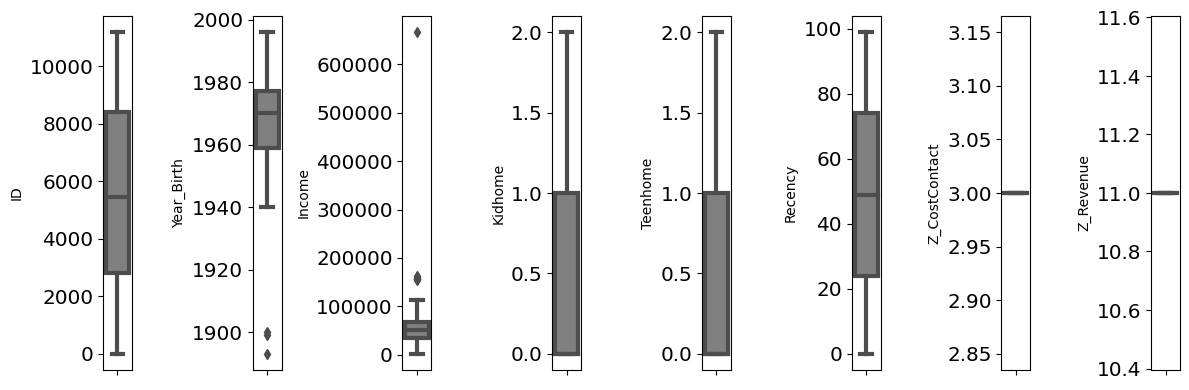

In [93]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='gray', orient='v')
    plt.tight_layout()

* Terdapat outliers pada kolom Year_Birth dan Income
* Pada kolom Z_CostContact dan Z_Revenue, hanya terdapat satu angka

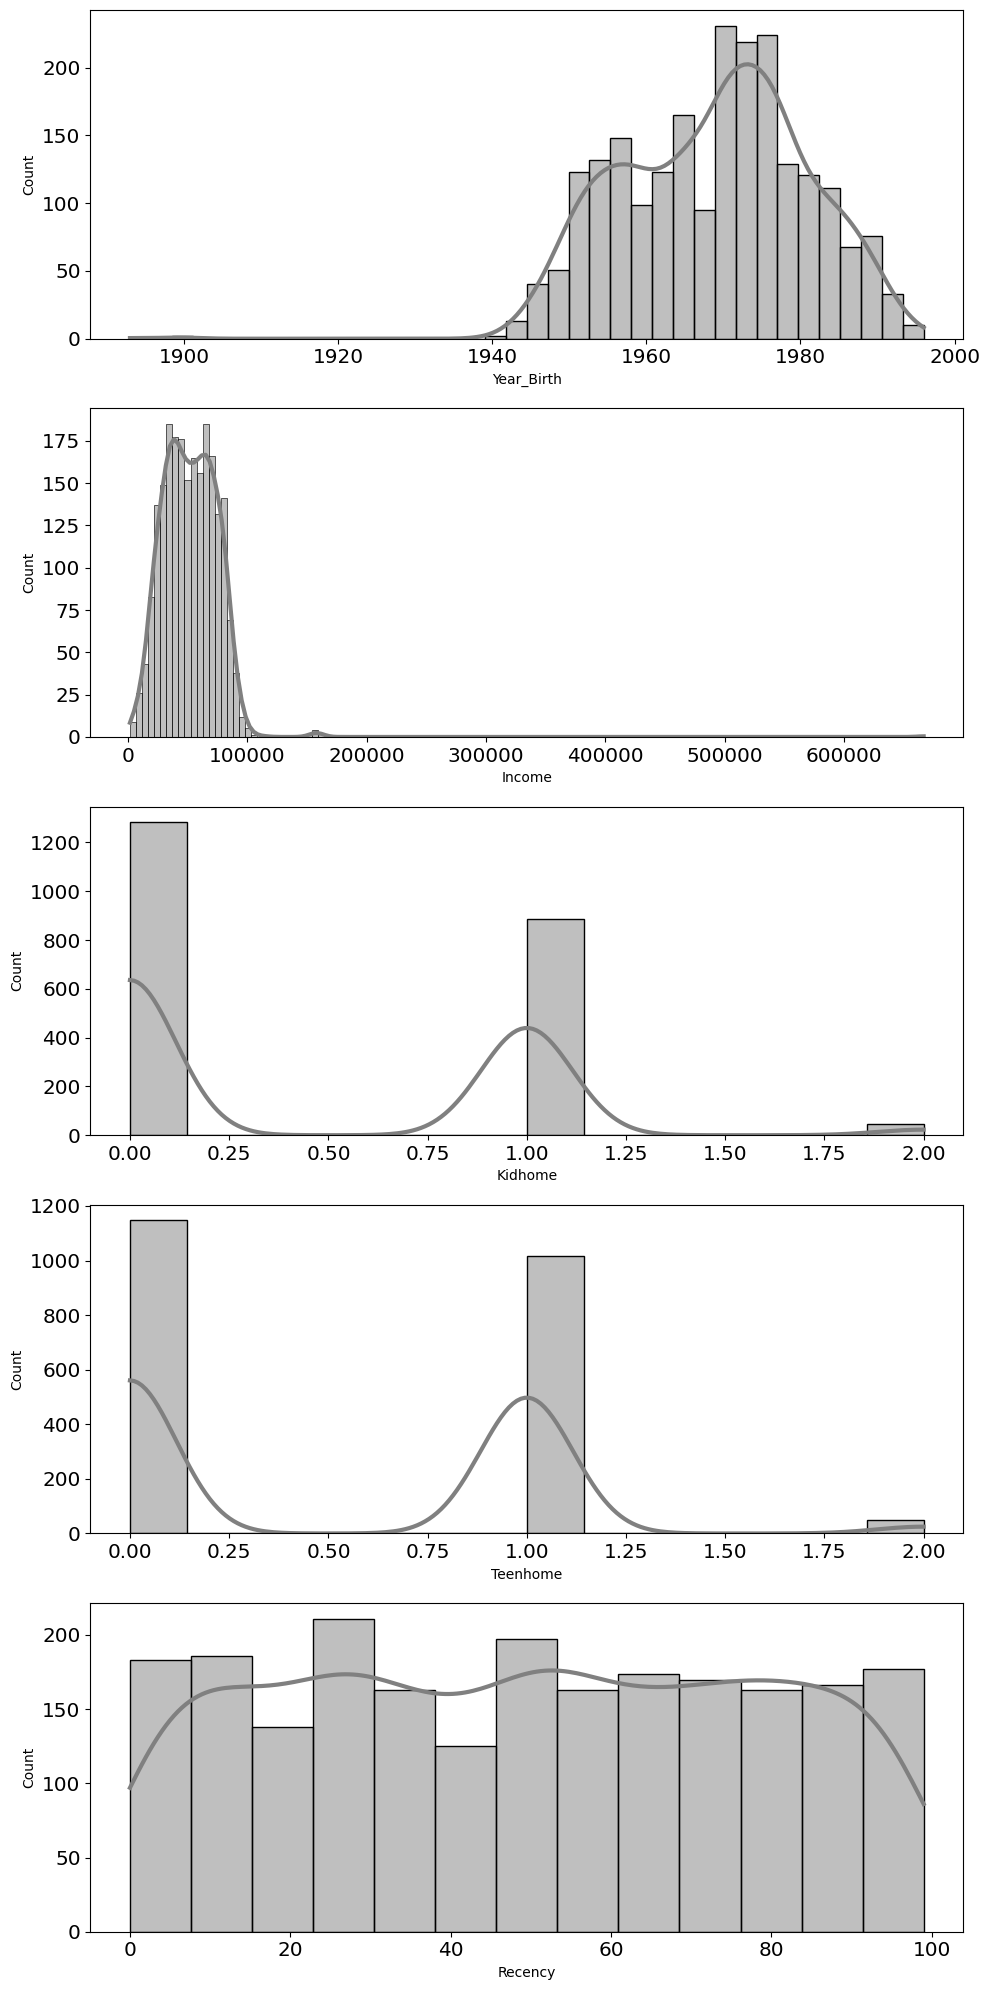

In [94]:
plt.figure(figsize=(10, 20))
for i in range(1, 6):
    plt.subplot(5, 1, i)
    sns.histplot(df[num[i]], color='gray', kde = True)
    plt.tight_layout()

* ...........

In [95]:
#drop na
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

3.

In [96]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,...,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,NaN,NaN,-0.021491
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,...,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,NaN,NaN,0.023692
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,...,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,NaN,NaN,-0.077909
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,...,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,NaN,NaN,-0.153901
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,...,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,NaN,NaN,-0.199766
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,...,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,NaN,NaN,0.246299
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,...,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,NaN,NaN,0.122443
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,...,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,NaN,NaN,0.237746
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,...,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,NaN,NaN,0.108145


In [104]:
df_corr = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

<AxesSubplot:>

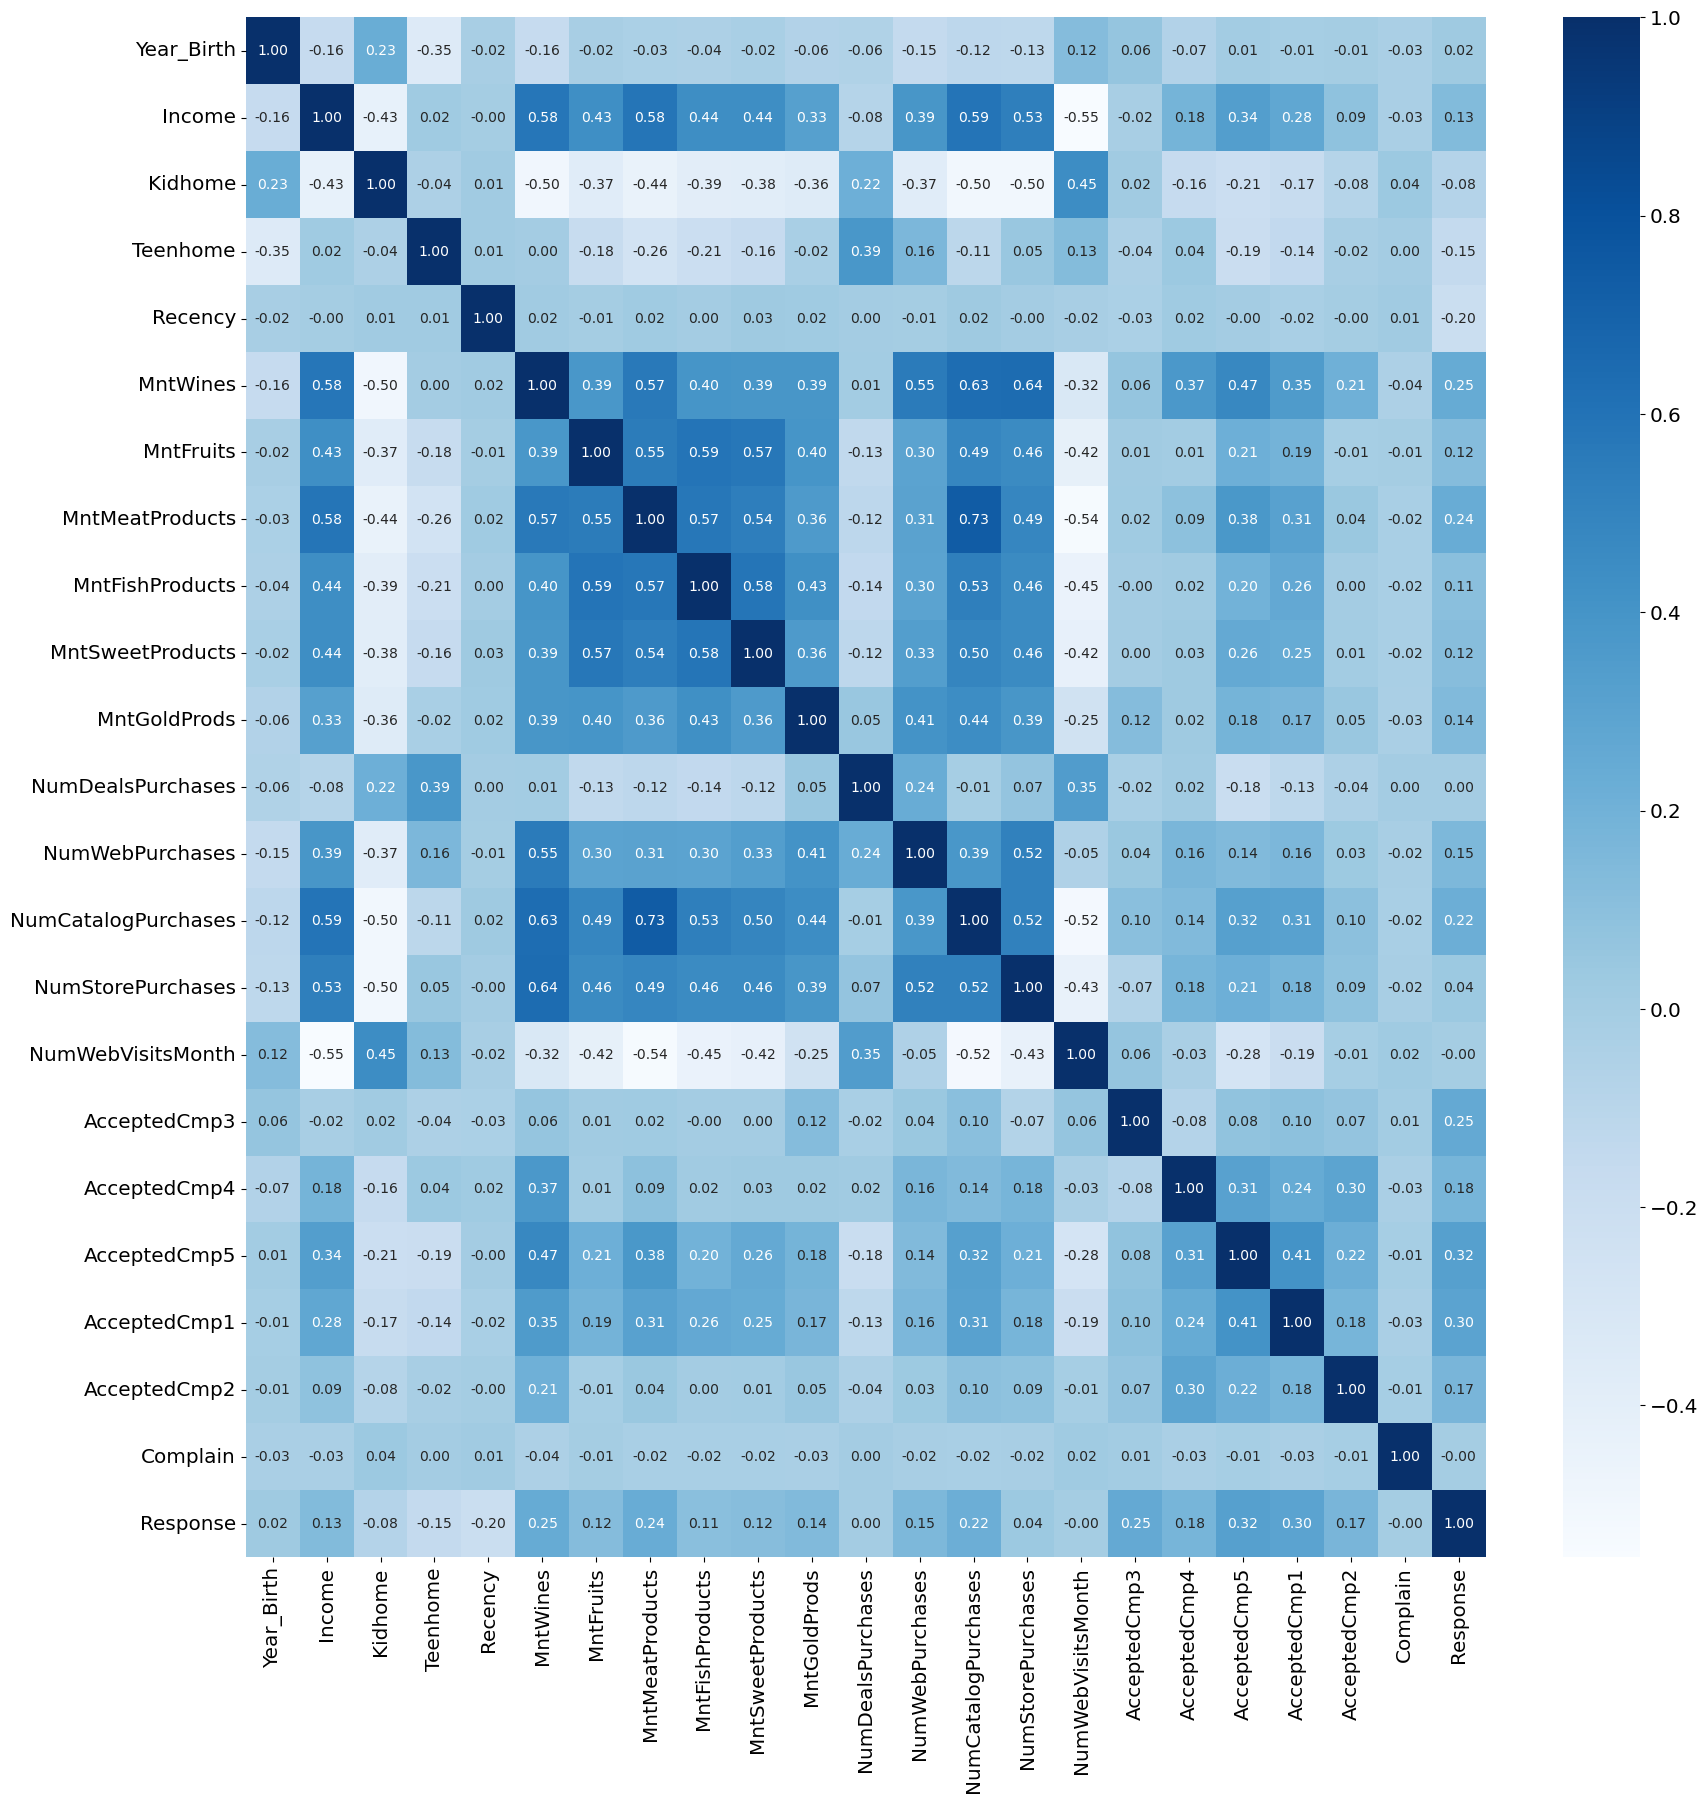

In [105]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr.corr(), cmap='Blues', annot=True, fmt='.2f')

A
* Kolom Complain kemungkinan dihapus, karena tidak berkorelasi
* Kolom Recency tidak ada korelasi sama variable, kecuali pada kolom Response (penting, target kita)

B
* Nilai korelasi >0.7 adalah MntMeatProducsts and NumWebPurchases
* Nilai korelasi range...., tergolong moderately correlation, ada hubungan antara pembelian produk
* Ada korelasi tinggi antara Income dengan jumlah pembelian/spending
* Semakin tinggi Income, semakin tinggi pembelian catalog, web, store
* In terms of campaign type, nilai korelasi tertinggi berada di acceptedcmp 5 yang nilainya 0.47 dengan MntWines
* Terdapat korelasi negatif antara kidhome dengan jumlah pemeblian/spending

4